In [0]:
## using ARIMA and machine learning to forecast agricultural commodities price

In [0]:
# data size in MB

In [0]:
import sys

In [37]:
sys.getsizeof(url_mprice)

106

In [0]:
## ARIMA model is used below to forecast prices variation from August to December 2019

In [0]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
url_mprice ='http://www.foodsecurityportal.org/api/countries/maize.csv'
maize_price = pd.read_csv(url_mprice)
maize_price.head(20)

,Country,Nov 12,Dec 12,Jan 13,Feb 13,Mar 13,Apr 13,May 13,Jun 13,Jul 13,Aug 13,Sep 13,Oct 13,Nov 13,Dec 13,Jan 14,Feb 14,Mar 14,Apr 14,May 14,Jun 14,Jul 14,Aug 14,Sep 14,Oct 14,Nov 14,Dec 14,Jan 15,Feb 15,Mar 15,Apr 15,May 15,Jun 15,Jul 15,Aug 15,Sep 15,Oct 15,Nov 15,Dec 15,Jan 16,...,Apr 16,May 16,Jun 16,Jul 16,Aug 16,Sep 16,Oct 16,Nov 16,Dec 16,Jan 17,Feb 17,Mar 17,Apr 17,May 17,Jun 17,Jul 17,Aug 17,Sep 17,Oct 17,Nov 17,Dec 17,Jan 18,Feb 18,Mar 18,Apr 18,May 18,Jun 18,Jul 18,Aug 18,Sep 18,Oct 18,Nov 18,Dec 18,Jan 19,Feb 19,Mar 19,Apr 19,May 19,Jun 19,Jul 19
0,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bahamas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Barbados,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Brazil,0.22,0.22,0.22,0.23,0.22,0.20,0.18,0.16,0.15,0.14,0.15,0.15,0.15,0.15,0.15,0.15,0.17,0.18,0.17,0.16,0.15,0.14,0.14,0.13,0.14,0.14,0.14,0.13,0.12,0.12,0.11,0.11,0.11,0.10,0.09,0.11,0.11,0.11,0.12,...,0.18,0.20,0.19,0.21,0.21,0.20,0.20,0.18,0.16,0.16,0.15,0.13,0.12,0.12,0.11,0.11,0.11,0.12,0.13,0.13,0.13,0.13,0.13,0.13,0.16,0.15,0.15,0.14,0.14,0.14,0.15,0.14,0.13,0.14,0.14,0.14,0.13,0.12,0.13,0.14
6,Cambodia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Chad,0.59,0.62,0.49,0.45,0.42,0.46,0.47,0.50,0.57,0.58,0.58,0.51,NaN,0.50,0.54,0.54,0.56,0.56,0.55,0.50,0.54,0.57,0.56,0.55,0.51,0.50,0.45,0.42,NaN,NaN,0.41,0.41,0.45,0.46,NaN,0.44,0.44,NaN,0.43,...,NaN,NaN,NaN,NaN,0.41,0.41,0.40,NaN,0.39,NaN,0.37,NaN,0.39,NaN,0.43,0.40,NaN,NaN,NaN,0.43,0.46,NaN,NaN,NaN,0.47,NaN,0.46,0.46,NaN,0.44,0.44,0.41,NaN,NaN,0.42,0.34,NaN,0.34,0.34,NaN
8,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.75,0.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Colombia,0.48,0.46,0.46,0.45,0.45,0.44,0.45,0.44,0.41,0.41,0.41,0.44,0.43,0.42,0.41,0.36,0.37,0.39,0.42,0.42,0.44,0.41,0.38,0.38,0.38,0.36,0.35,0.35,0.32,NaN,0.36,0.35,0.33,0.33,0.33,0.38,0.39,0.34,0.30,...,0.33,0.34,0.53,0.55,0.36,0.32,0.32,0.30,0.33,0.33,0.29,0.27,0.30,0.30,0.31,0.34,0.33,0.34,0.35,0.35,0.34,0.33,

In [3]:
WestAfrica = maize_price.iloc[[26, 31, 32, 39],:]
#WestAfrica
WestAfrica.set_index('Country')
WA = WestAfrica.transpose()
WA.columns= ['Liberia','Niger', 'Nigeria', 'Sierra Leone']
WA.drop('Country', inplace=True)
WA.reindex()
WA

,Liberia,Niger,Nigeria,Sierra Leone
Nov 12,NaN,NaN,0.36,NaN
Dec 12,NaN,NaN,0.4,NaN
Jan 13,NaN,NaN,0.42,NaN
Feb 13,NaN,NaN,0.41,NaN
Mar 13,NaN,NaN,0.45,NaN
...,...,...,...,...
Mar 19,NaN,NaN,0.29,NaN
Apr 19,NaN,NaN,NaN,NaN
May 19,NaN,0.33,0.29,NaN
Jun 19,NaN,0.26,0.29,NaN


In [4]:
WA_dt = WA.reset_index()
WA_dt.columns= ['Date','Liberia','Niger', 'Price', 'Sierra Leone']
#WA_dt
Nigeria_dt = WA_dt.drop(['Liberia', 'Niger','Sierra Leone'], axis = 'columns')
Nigeria_dt.fillna(0.32, inplace=True)
Nigeria_dt

,Date,Price
0,Nov 12,0.36
1,Dec 12,0.40
2,Jan 13,0.42
3,Feb 13,0.41
4,Mar 13,0.45
...,...,...
76,Mar 19,0.29
77,Apr 19,0.32
78,May 19,0.29
79,Jun 19,0.29


In [0]:
Nigeria_dt.Date = pd.to_datetime(Nigeria_dt.Date, errors='coerce')

In [6]:
ser = pd.Series(pd.date_range('2012-10', periods=82, freq='M' ))
ser.to_numpy(dtype=object)
ser.to_numpy(dtype="datetime64[ns]")

array(['2012-10-31T00:00:00.000000000', '2012-11-30T00:00:00.000000000',
       '2012-12-31T00:00:00.000000000', '2013-01-31T00:00:00.000000000',
       '2013-02-28T00:00:00.000000000', '2013-03-31T00:00:00.000000000',
       '2013-04-30T00:00:00.000000000', '2013-05-31T00:00:00.000000000',
       '2013-06-30T00:00:00.000000000', '2013-07-31T00:00:00.000000000',
       '2013-08-31T00:00:00.000000000', '2013-09-30T00:00:00.000000000',
       '2013-10-31T00:00:00.000000000', '2013-11-30T00:00:00.000000000',
       '2013-12-31T00:00:00.000000000', '2014-01-31T00:00:00.000000000',
       '2014-02-28T00:00:00.000000000', '2014-03-31T00:00:00.000000000',
       '2014-04-30T00:00:00.000000000', '2014-05-31T00:00:00.000000000',
       '2014-06-30T00:00:00.000000000', '2014-07-31T00:00:00.000000000',
       '2014-08-31T00:00:00.000000000', '2014-09-30T00:00:00.000000000',
       '2014-10-31T00:00:00.000000000', '2014-11-30T00:00:00.000000000',
       '2014-12-31T00:00:00.000000000', '2015-01-31

In [7]:
Nigeria_dt['col4'] = Nigeria_dt['Price'].map(ser)
#print (Nigeria_dt)
Nigeria_dt['col4'] = ser
#Nigeria_dt
Nig_dt = Nigeria_dt.drop('Date', axis='columns')
Nig_dt = Nig_dt.rename(columns={'col4' : 'dt'})
#Nig_dt
Nig_dts = Nig_dt.set_index('dt')
Nig_dts

,Price
dt,
2012-10-31,0.36
2012-11-30,0.40
2012-12-31,0.42
2013-01-31,0.41
2013-02-28,0.45
...,...
2019-02-28,0.29
2019-03-31,0.32
2019-04-30,0.29


In [0]:
# plot time series data

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML, display_html
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


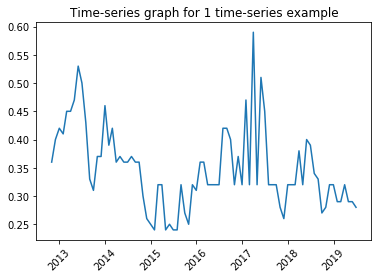

In [9]:
f, ax = plt.subplots(1,1)
ax.plot(Nig_dts['Price'])

# Add title
ax.set_title('Time-series graph for 1 time-series example')

# Rotate x-labels
ax.tick_params(axis = 'x', rotation = 45)

# Show graph
plt.show()
plt.close()

In [0]:
## Analysing Stationarity

In [0]:
from statsmodels.tsa.stattools import adfuller

In [0]:
def test_stationarity(df, ts):  
    """
    Test stationarity using moving average statistics and Dickey-Fuller test

    """
    # Estimating rolling statistics
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    # Plotting rolling estimate
    orig = plt.plot(df[ts], 
                   color = 'blue', 
                   label = 'Original')
    mean = plt.plot(rolmean, 
                   color = 'red', 
                   label = 'Rolling Mean')
    orig = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Dickey-Fuller test
    # Ho: time series is not stationary
    # H1: time series is stationary
   
    print('Results of Dickey-Fuller Test:') 
    dftest = adfuller(df[ts], 
                     autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], 
                        index = ['Test Statistic', 
                                'p-value', 
                                '# Lags Used', 
                                'Number of Observation Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 

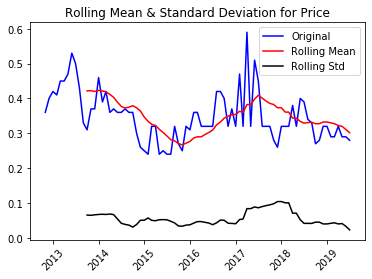

Results of Dickey-Fuller Test:
Test Statistic                -2.526104
p-value                        0.109251
# Lags Used                    1.000000
Number of Observation Used    79.000000
Critical Value (1%)           -3.515977
Critical Value (5%)           -2.898886
Critical Value (10%)          -2.586694
dtype: float64


In [17]:
test_stationarity(df = Nig_dts, ts = 'Price')

In [0]:
# At p=0.05 < p-value = 0.10  ---> data is not stationary = Ho

In [0]:
def plot_transformed_data(df, ts, ts_transform): 
    """
    Plot transformed and original time series data
    """
    # Plot time series data
    f, ax = plt.subplots(1,1)
    ax.plot(df[ts])
    ax.plot(df[ts_transform], color = 'red')
    
    # Add title
    ax.set_title('%s and %s time-series graph' %(ts, ts_transform))
    
    # Rotate x-labels
    ax.tick_params(axis = 'x', rotation = 45)
    
    # Add Legend
    ax.legend([ts, ts_transform])
    
    plt.show()
    plt.close()
    
    return 

In [0]:
## Correcting Stationarity 

In [22]:
# Transform - log ts
Nig_dts['ts_log'] = Nig_dts['Price'].apply(lambda x: np.log(x))

# Transformation - 7 days moving averages of log ts
Nig_dts['ts_log_moving_avg'] = Nig_dts['ts_log'].rolling(window = 7, center = False).mean()

# Transformation - 7 days moving averages of ts
Nig_dts['ts_moving_avg'] = Nig_dts['Price'].rolling(window = 7, center = False).mean()

# Transformation - Difference between logged ts and first-order differencee logged ts
Nig_dts['ts_log_diff'] = Nig_dts['ts_log'].diff()

# Transformation - Difference between ts and moving average ts
Nig_dts['ts_moving_avg_diff'] = Nig_dts['Price'] - Nig_dts['ts_moving_avg']

# Transformation - Difference between logged ts and logged moving average ts
Nig_dts['ts_log_moving_avg_diff'] = Nig_dts['ts_log'] - Nig_dts['ts_log_moving_avg'] 

# Transformation - Difference between logged ts and logged moving average ts
Nig_dts_transform = Nig_dts.dropna()

# Transformation - logged exponentially weighted moving averages (EWMA) ts 
Nig_dts_transform['ts_log_ewma'] = Nig_dts_transform['ts_log'].ewm(halflife = 7, ignore_na = False, min_periods = 0, adjust = True).mean()

# Transformation - Difference between logged ts and logged EWMA ts
Nig_dts_transform['ts_log_ewma_diff'] = Nig_dts_transform['ts_log']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Price,ts_log,ts_log_moving_avg,ts_moving_avg,ts_log_diff,ts_moving_avg_diff,ts_log_moving_avg_diff,ts_log_ewma,ts_log_ewma_diff
dt,,,,,,,,,
2013-04-30,0.47,-0.755023,-0.864154,0.422857,0.043485,0.047143,0.109132,-0.755023,-0.755023
2013-05-31,0.53,-0.634878,-0.808901,0.447143,0.120144,0.082857,0.174023,-0.691979,-0.634878
2013-06-30,0.50,-0.693147,-0.777023,0.461429,-0.058269,0.038571,0.083876,-0.692407,-0.693147
2013-07-31,0.43,-0.843970,-0.773662,0.462857,-0.150823,-0.032857,-0.070308,-0.736097,-0.843970
2013-08-31,0.33,-1.108663,-0.804671,0.451429,-0.264693,-0.121429,-0.303992,-0.826045,-1.108663


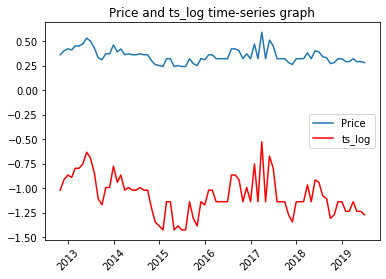

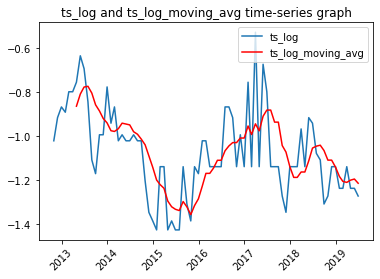

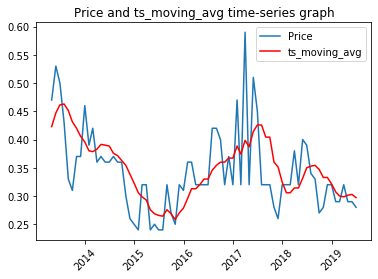

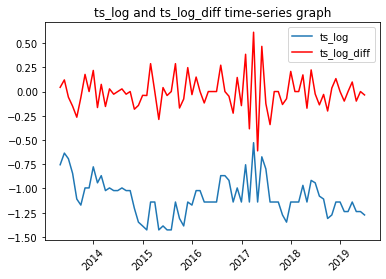

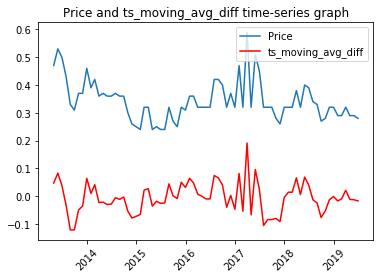

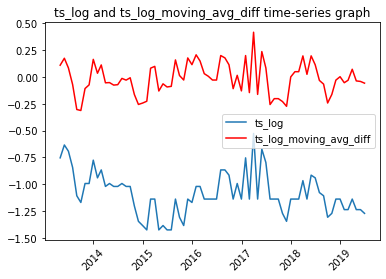

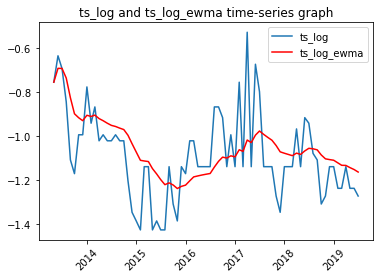

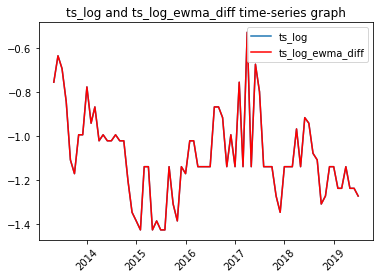

In [23]:
# Display data
display(Nig_dts_transform.head())

# Plot data
plot_transformed_data(df = Nig_dts, 
                      ts = 'Price', 
                      ts_transform = 'ts_log')
# Plot data
plot_transformed_data(df = Nig_dts, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_moving_avg')

# Plot data
plot_transformed_data(df = Nig_dts_transform, 
                      ts = 'Price', 
                      ts_transform = 'ts_moving_avg')

# Plot data
plot_transformed_data(df = Nig_dts_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_diff')

# Plot data
plot_transformed_data(df = Nig_dts_transform, 
                      ts = 'Price', 
                      ts_transform = 'ts_moving_avg_diff')

# Plot data
plot_transformed_data(df = Nig_dts_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_moving_avg_diff')

# Plot data
plot_transformed_data(df = Nig_dts_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_ewma')
# Plot data
plot_transformed_data(df = Nig_dts_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_ewma_diff')

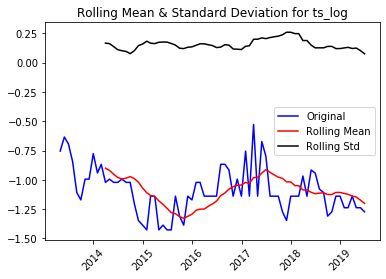

Results of Dickey-Fuller Test:
Test Statistic                -3.234401
p-value                        0.018078
# Lags Used                    1.000000
Number of Observation Used    73.000000
Critical Value (1%)           -3.523284
Critical Value (5%)           -2.902031
Critical Value (10%)          -2.588371
dtype: float64


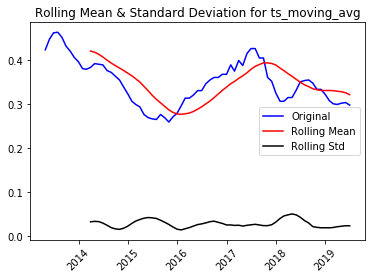

Results of Dickey-Fuller Test:
Test Statistic                -2.459939
p-value                        0.125528
# Lags Used                    9.000000
Number of Observation Used    65.000000
Critical Value (1%)           -3.535217
Critical Value (5%)           -2.907154
Critical Value (10%)          -2.591103
dtype: float64


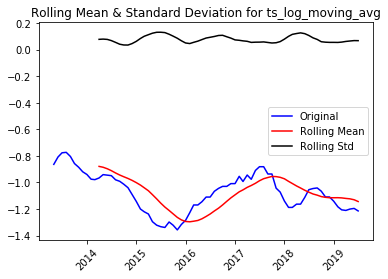

Results of Dickey-Fuller Test:
Test Statistic                -2.508712
p-value                        0.113369
# Lags Used                    9.000000
Number of Observation Used    65.000000
Critical Value (1%)           -3.535217
Critical Value (5%)           -2.907154
Critical Value (10%)          -2.591103
dtype: float64


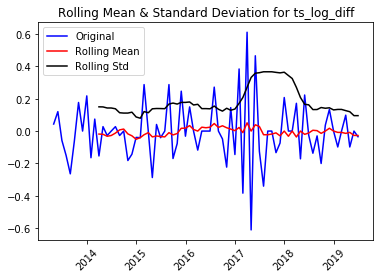

Results of Dickey-Fuller Test:
Test Statistic               -1.501622e+01
p-value                       1.038083e-27
# Lags Used                   0.000000e+00
Number of Observation Used    7.400000e+01
Critical Value (1%)          -3.521980e+00
Critical Value (5%)          -2.901470e+00
Critical Value (10%)         -2.588072e+00
dtype: float64


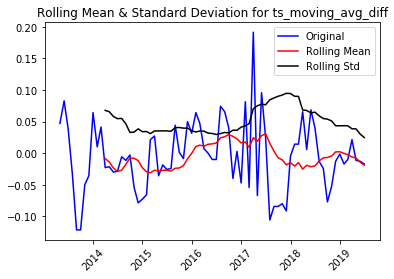

Results of Dickey-Fuller Test:
Test Statistic                -5.333439
p-value                        0.000005
# Lags Used                    3.000000
Number of Observation Used    71.000000
Critical Value (1%)           -3.526005
Critical Value (5%)           -2.903200
Critical Value (10%)          -2.588995
dtype: float64


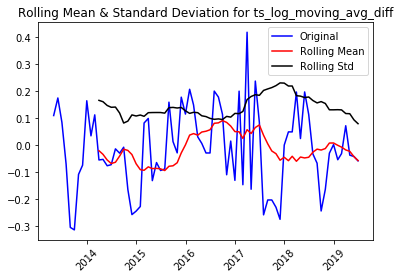

Results of Dickey-Fuller Test:
Test Statistic                -4.907494
p-value                        0.000034
# Lags Used                    3.000000
Number of Observation Used    71.000000
Critical Value (1%)           -3.526005
Critical Value (5%)           -2.903200
Critical Value (10%)          -2.588995
dtype: float64


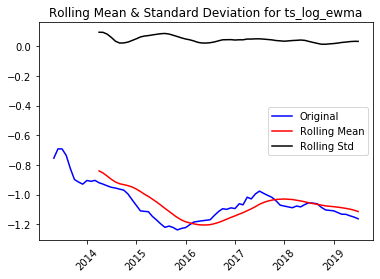

Results of Dickey-Fuller Test:
Test Statistic                -3.723581
p-value                        0.003793
# Lags Used                    2.000000
Number of Observation Used    72.000000
Critical Value (1%)           -3.524624
Critical Value (5%)           -2.902607
Critical Value (10%)          -2.588679
dtype: float64


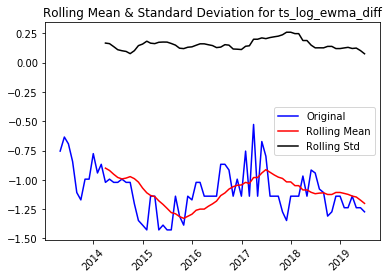

Results of Dickey-Fuller Test:
Test Statistic                -3.234401
p-value                        0.018078
# Lags Used                    1.000000
Number of Observation Used    73.000000
Critical Value (1%)           -3.523284
Critical Value (5%)           -2.902031
Critical Value (10%)          -2.588371
dtype: float64


In [24]:
# Perform stationarity test
test_stationarity(df = Nig_dts_transform, 
                  ts = 'ts_log')

# Perform stationarity test
test_stationarity(df = Nig_dts_transform, 
                  ts = 'ts_moving_avg')

# Perform stationarity test
test_stationarity(df = Nig_dts_transform, 
                  ts = 'ts_log_moving_avg')

# Perform stationarity test
test_stationarity(df = Nig_dts_transform,
                  ts = 'ts_log_diff')

# Perform stationarity test
test_stationarity(df = Nig_dts_transform,
                  ts = 'ts_moving_avg_diff')

# Perform stationarity test
test_stationarity(df = Nig_dts_transform,
                  ts = 'ts_log_moving_avg_diff')

# Perform stationarity test
test_stationarity(df = Nig_dts_transform, 
                  ts = 'ts_log_ewma')

# Perform stationarity test
test_stationarity(df = Nig_dts_transform,
                  ts = 'ts_log_ewma_diff')

In [0]:
#The next step is to decompose the original plot to show:
# Price trend, seasonality and residual in data. 
#Note using fbprophet gives more precise plots. 
# for instance it is possible to analyse price seasonality within a week 
# fbprphet will be used in the final project. 